

# Project: Investigate a Dataset - [No-show Appointments](https://www.kaggle.com/joniarroba/noshowappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. **The following variables are used for the analysis:**
* **ScheduledDay:** tells us on what day the patient set up their appointment.
* **Neighborhood:** indicates the location of the hospital.
* **Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* **Noshow:** it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis

> Many factors may predict that a patient will not appear in the hospital on his appointment. **A lot of question could be answered through this dataset:**
* **Q1:** Is there a correlation between chronic diseases like Hypertension, Diabetes, and Alcoholism on the patient's commitment to his appointment?
* **Q2:** Was patients' commitment to the hospital appointment associated with their Demographic Characteristics (Age, Gender, Handicap, and Location of the hospital)?
* **Q3:** Is there an association between receiving SMS before the hospital appointment and and patients' commitment to the hospital appointment?
* **Q4:** Is there an association between patient enrollment in the "Bolsa Familia" Program and patients' commitment to the hospital appointment?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> First, I load the dataset and explore the general properties and the data type for each variable, ensuring cleanliness and its suitability for analysis. 


### General Properties


In [2]:
# Loading Dataset:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Explore general information about data variables:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Describing statistical features of variables:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> This data set consists of 14 columns and 110527 cases. No missing cases appeared in any column, but I let's investigate further.


### Data Cleaning

>* **First,** Searching for any missing, or duplicated values and dealing with it.
* **Second,** Many variables in this data are encoded as dummy variables (0,1). So, I will convert it to the original nominal type (Yes, No)
* **Third,** I will change the `ScheduledDay` and the `AppointmentDay` to `datetime` data type.
* **Fourth,** As the `Age` variable has unreliable minimum `-1` and maximum `115`, I will drop any unreliable values.
* **Fifth,** I will change the name of the variables for more readable name.

*After finishing these steps, the data will be ready for the next step.*
 

In [5]:
# Checking any null values in the dataset:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Checking any duplicated values in the dataset:
df.duplicated().sum()

0

Seems that the data set have no missing or duplicated values, **That's Great!**. So, to the next Step.
*Encoding*

In [7]:
# Changing levels of Gender variable into Male & Female:

df['Gender'] = df['Gender'].str[0].str.upper().map({'M':'Male', 'F':'Female'})

In [8]:
# Converting some variables from integer into string:

dummy_variables = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for i in dummy_variables:
    df[i] = df[i].astype(str)

In [9]:
# Releveling these variables from Binary coding to Yes & No:

dummy1 = ['Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
dummy2 = ['Scholarship', 'Handcap']

for i in dummy1:
    df[i] = df[i].str[0].str.upper().map({'0':'No', '1':'Yes'})

for i in dummy2:
    df[i] = df[i].str[0].str.upper().map({'0':'False', '1':'True'})


In [10]:
# Check if the rleveling process ended succefully:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,Yes,No,No,False,No,No


In [11]:
# Droping unnecessary columns `PatientId` and `AppointmentID`

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

*Dealing with Time variables: `ScheduledDay` and `AppointmentDay`*

In [12]:
# Chaning time varibles into datetime type:

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

*Now, I will remove unreliable values from `Age` values. I will drop values less than 0 and all values greater than 100*

In [13]:
df = df[df['Age'] > 0] # Droping all cases less than 0
df = df[df['Age'] < 100] # Droping all cases more than 100

In [14]:
# Checking the final Shape of the data:

df.shape

(106976, 12)

*Finally, I will change the variables names to more usable name:*

In [18]:
# Changing the name of variables to be more readable:

df.rename({'no-show':'Not_Showed', 'Hipertension': 'hypertension'}, axis=1, inplace=True)

In [20]:
# Remove all spaces and uppercase from column names:

df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [21]:
# Checking final data type and columns names:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106976 entries, 0 to 110526
Data columns (total 12 columns):
gender            106976 non-null object
scheduledday      106976 non-null datetime64[ns]
appointmentday    106976 non-null datetime64[ns]
age               106976 non-null int64
neighbourhood     106976 non-null object
scholarship       106976 non-null object
hypertension      106976 non-null object
diabetes          106976 non-null object
alcoholism        106976 non-null object
handcap           106777 non-null object
sms_received      106976 non-null object
not_showed        106976 non-null object
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 10.6+ MB


> **Finally,** we have 106976 cases (after droping `Age` values) and 12 columns, and **Data set is finally ready for the Exploratory Data Analysis**  

<a id='eda'></a>
## Exploratory Data Analysis


### General Features of the Time Variables and the proportion of Appeared vs didn't Appeared patients:

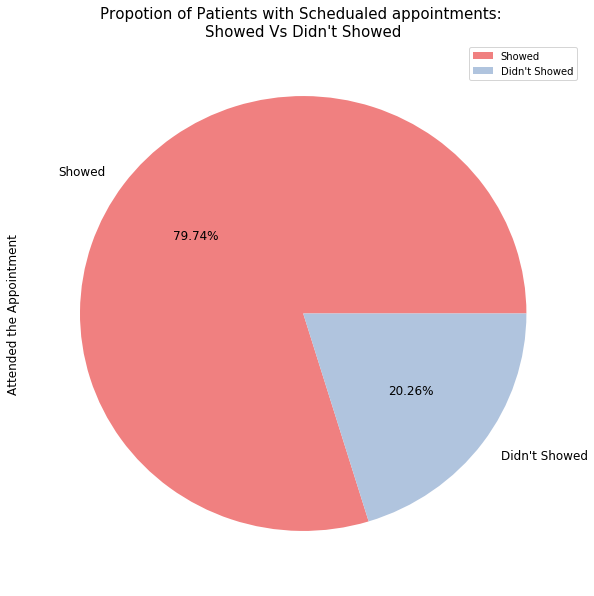

In [22]:
Cases = df['not_showed'].value_counts() # count of all cases who didn't show
# pie chart variable and color
proportion_chart = Cases.plot.pie(figsize=(10,10), colors= ['lightcoral','lightsteelblue'],labels=['Showed', 'Didn\'t Showed'], autopct='%0.2f%%', fontsize = 12)
# Title of the graph
proportion_chart.set_title("Propotion of Patients with Schedualed appointments: \nShowed Vs Didn't Showed", fontsize = 15);
# Changing ylable 
plt.ylabel('Attended the Appointment', fontsize = 12)
# Adding legends
plt.legend();

In [23]:
Showed = df.query('not_showed == "No"') # Subsitting only showed patients
Not_showed = df.query('not_showed == "Yes"') # Subsitting only didn't showed patients

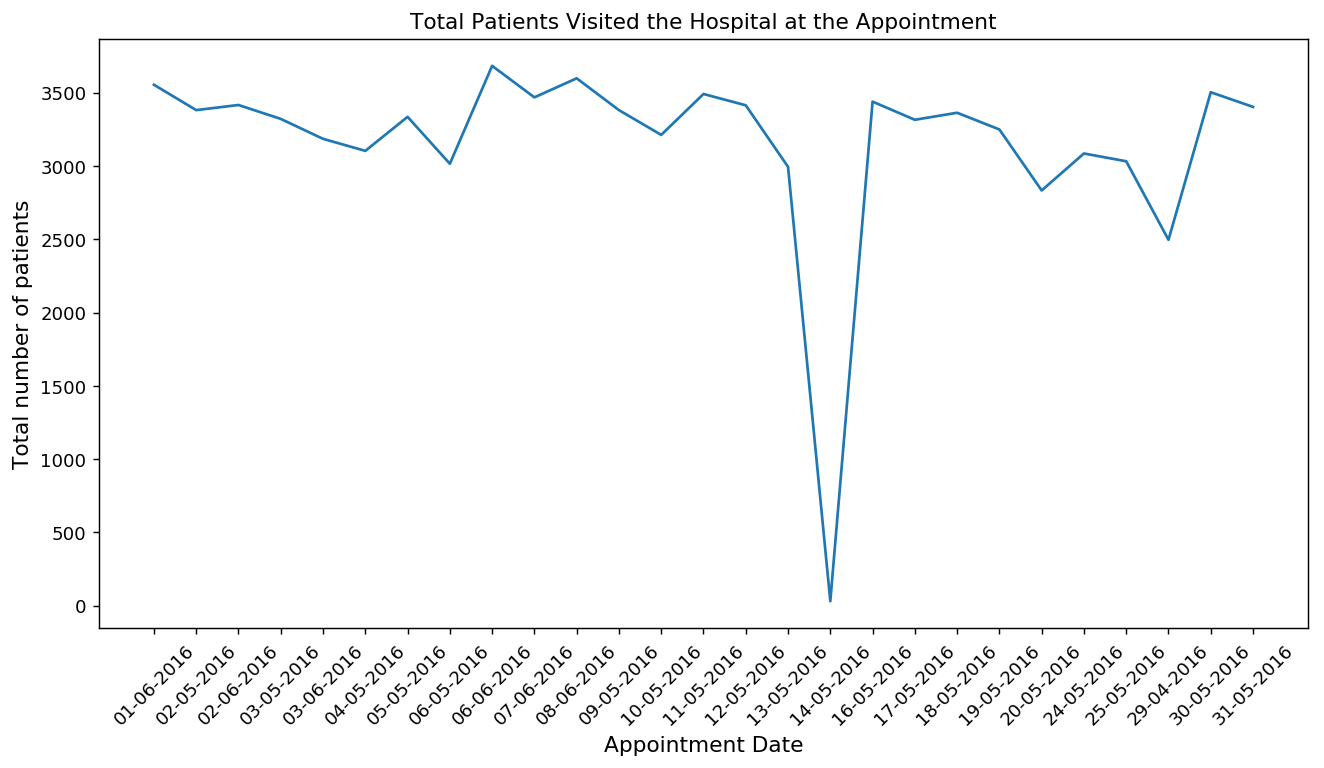

In [24]:
# Group by appointment day for only showed patients
showed_time = Showed.groupby(Showed['appointmentday'].dt.strftime('%d-%m-%Y'))['not_showed'].count()
# Modifying the graph size
plt.figure(figsize=(12,6), dpi = 130)
# Changing xlable
plt.xlabel('Appointment Date', fontsize = 12)
# Changing ylable
plt.ylabel('Total number of patients', fontsize = 12)
# Changing title
plt.title('Total Patients Visited the Hospital at the Appointment')
# Rotating the levels of x axis
plt.xticks(rotation=45)
# Plotting
plt.plot(showed_time)
# Printting line chart
plt.show()

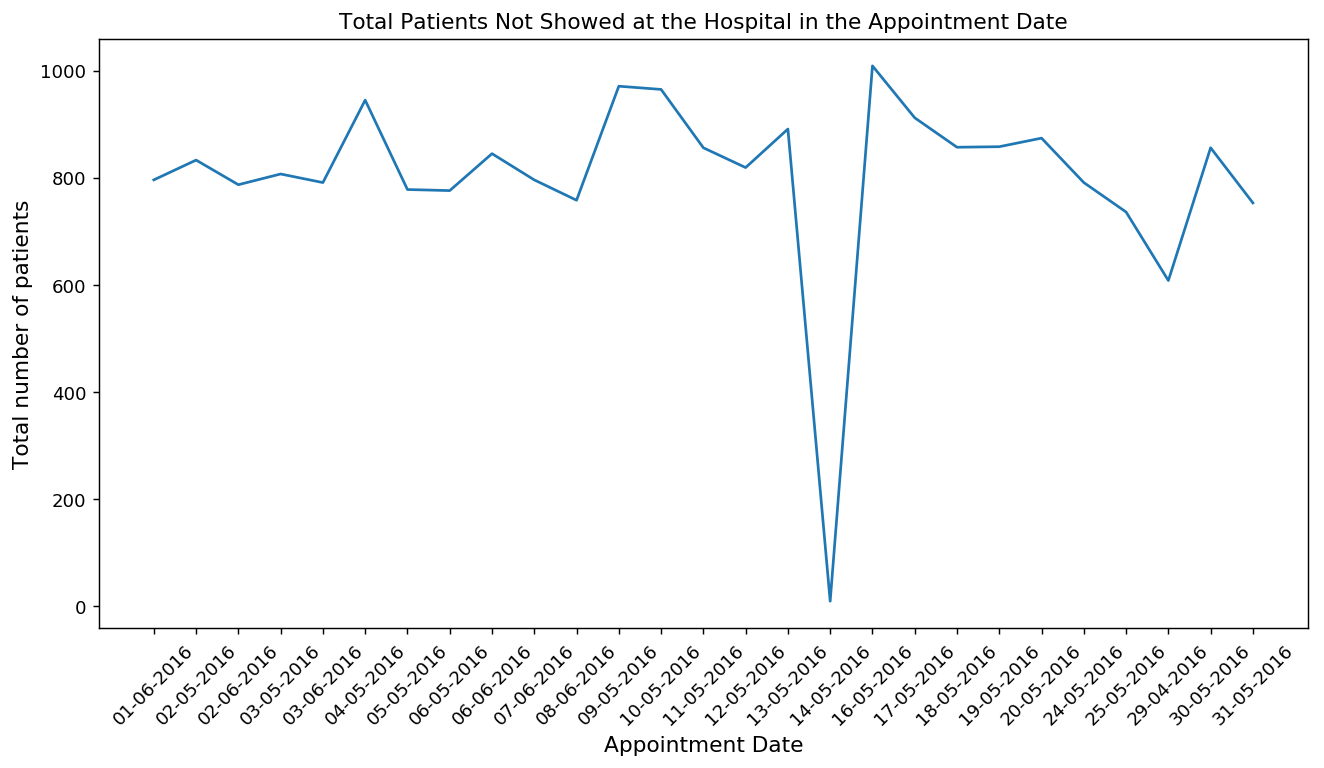

In [25]:
# Group by appointment day for only didn't showed patients
Not_showed_time = Not_showed.groupby(Not_showed['appointmentday'].dt.strftime('%d-%m-%Y'))['not_showed'].count()
# Modifying the graph size
plt.figure(figsize=(12,6), dpi = 130)
# Changing xlable
plt.xlabel('Appointment Date', fontsize = 12)
# Changing ylable
plt.ylabel('Total number of patients', fontsize = 12)
# Changing title
plt.title('Total Patients Not Showed at the Hospital in the Appointment Date')
# Rotating the levels of x axis
plt.xticks(rotation=45)
# Plotting
plt.plot(Not_showed_time)
# Printting line chart
plt.show()

In [26]:
# Group by appointment day (by month) for only didn't showed patients

df.groupby(df['appointmentday'].dt.strftime('%m-%Y'))['not_showed'].value_counts()

appointmentday  not_showed
04-2016         No             2496
                Yes             608
05-2016         No            61899
                Yes           16296
06-2016         No            20904
                Yes            4773
Name: not_showed, dtype: int64

In [27]:
# Group by scheduled day (by month) for only didn't showed patients
df.groupby(df['scheduledday'].dt.strftime('%m-%Y'))['not_showed'].value_counts()

scheduledday  not_showed
01-2016       No               42
              Yes              18
02-2016       No              189
              Yes              79
03-2016       No             2332
              Yes            1156
04-2016       No            16810
              Yes            7584
05-2016       No            53897
              Yes           11455
06-2016       No            11986
              Yes            1366
11-2015       No                1
12-2015       No               42
              Yes              19
Name: not_showed, dtype: int64

> **According to the Figure Below:** `05-2016` was the busiest month, with about `78195` patients visiting the hospital during that month.
> About `61899` patients not missed there appointment and `16296` missed their visit to the hospital. _No visits or appointments was in May 13, 2016._

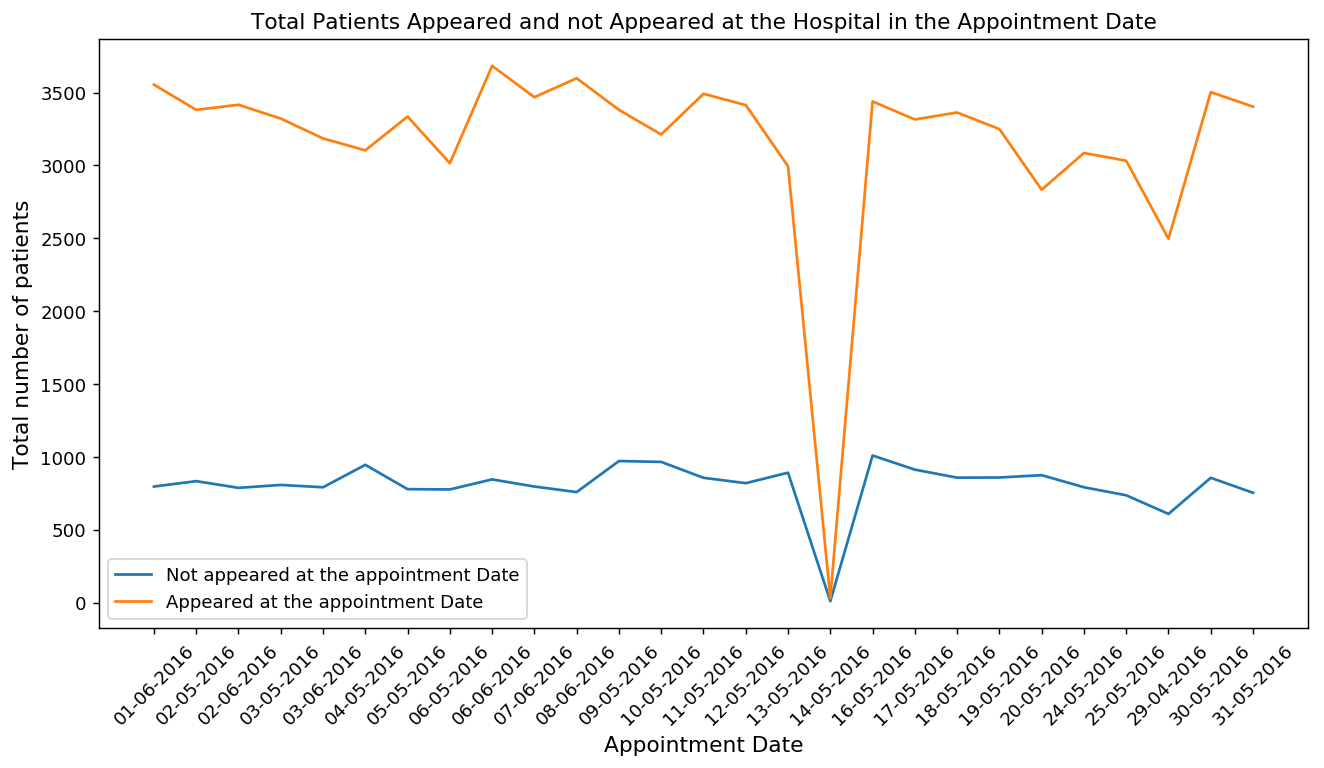

In [28]:
# Modifying the graph size
plt.figure(figsize=(12,6), dpi = 130)
# First plot for didn't showed patients
plt.plot(Not_showed_time, label = "Not appeared at the appointment Date")
# Second plot for showed patients
plt.plot(showed_time, label = "Appeared at the appointment Date")
# Changing xlabel
plt.xlabel('Appointment Date', fontsize = 12)
# Changing ylabel
plt.ylabel('Total number of patients', fontsize = 12)
# Changing titke
plt.title('Total Patients Appeared and not Appeared at the Hospital in the Appointment Date')
# Rotating the levels of x axis
plt.xticks(rotation=45)
# Plotting
plt.legend()
# # Printting line chart
plt.show()

### _Research Question 1:_ Is there a correlation between chronic diseases like Hypertension, Diabetes, and Alcoholism on the patient's commitment to his appointment?

_Let's make 2 functions: 1st to calculate proportions, and the 2nd function for graph_

In [29]:
def proportion(data, arg1):
    """
    Calculating the proportion of explanatory variables grouped by show column 
    """
    data1 = data.groupby(arg1)['not_showed'].value_counts() #first grouping by showing status and desired explanatory variable
    total = df['not_showed'].count() # total counts cases in the data
    proportion = round((data1/total) *100) # proportion of patients
    if 'not_showed' == "Yes": # Different printting statement according to showing status
        print("The proportion of Not {} patients who didn't showed in their appointments was about {}%, while the proportion of {} patients who didn't showed was {}% from total patients.".format(arg1, proportion[0], arg1, proportion[1]))
    else:
        print("The proportion of Not {} patients who showed in their appointments was about {}%, while the proportion of {} patients who showed was {}% from total patients.".format(arg1, proportion[0], arg1, proportion[1]))
    return

In [30]:
def count(data, arg1):
    """Calculating Count of showed or didn't showed patients according to the group by argument"""
    count = data.groupby(arg1)['not_showed'].value_counts() #group by the wanted variable
    print(count)
    return

In [31]:
def graph(data, arg1):
    """
    Drawing bar plot for all patients either showed or didn't showed according the explanatory variable wanted
    to investigate
    """
    plt.figure(figsize=(12,6), dpi = 130) # Increasing graph size
    sns.countplot(data=data,x=arg1,palette=['midnightblue','lightcoral'],hue='not_showed',dodge=True) # Plotting arguments
    plt.xlabel(arg1.capitalize(), fontsize = 12) # changing xlable
    plt.ylabel('Total number of patients', fontsize = 12) # changing ylable
    plt.legend(labels=['Appear in appointment',"Didn't appear in appointment"],title=False,frameon=False) # changing legends names
    plt.title('Total Patients Appeared and not Appeared at the Hospital by {}'.format((arg1).capitalize())) # Changing graph title
    sns.despine()
    return

> **Hypertension:**
All Visulaization used in this section from the seaborn documentation. *To read more about seaborn* [Click Here](https://seaborn.pydata.org/generated/seaborn.countplot.html).

In [32]:
count(df, 'hypertension') 

hypertension  not_showed
No            No            67271
              Yes           17905
Yes           No            18028
              Yes            3772
Name: not_showed, dtype: int64


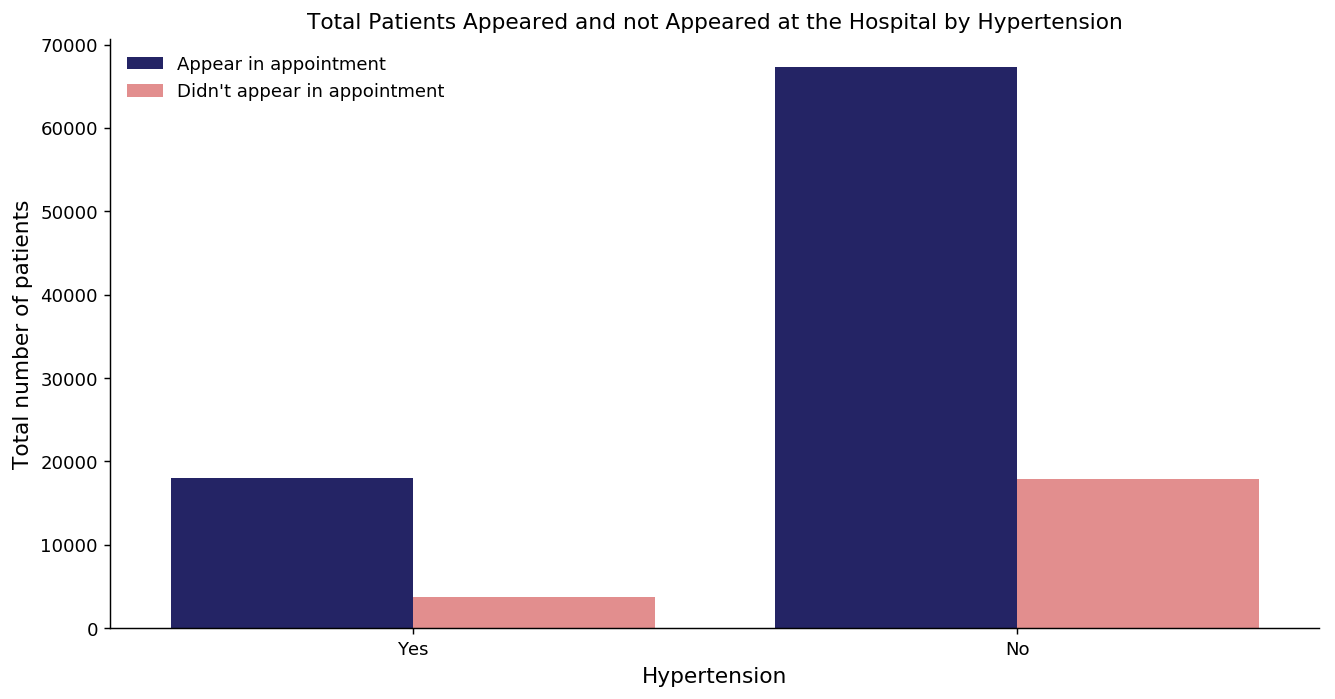

In [33]:
graph(df, 'hypertension')

_Didn't Appeared in their appointments:_

In [34]:
proportion(Not_showed, 'hypertension')

The proportion of Not hypertension patients who showed in their appointments was about 17.0%, while the proportion of hypertension patients who showed was 4.0% from total patients.


_Appeared in their appointments:_

In [35]:
proportion(Showed, 'hypertension')

The proportion of Not hypertension patients who showed in their appointments was about 63.0%, while the proportion of hypertension patients who showed was 17.0% from total patients.


> **Diabetes:**

In [36]:
count(df, 'diabetes')

diabetes  not_showed
No        No            78786
          Yes           20247
Yes       No             6513
          Yes            1430
Name: not_showed, dtype: int64


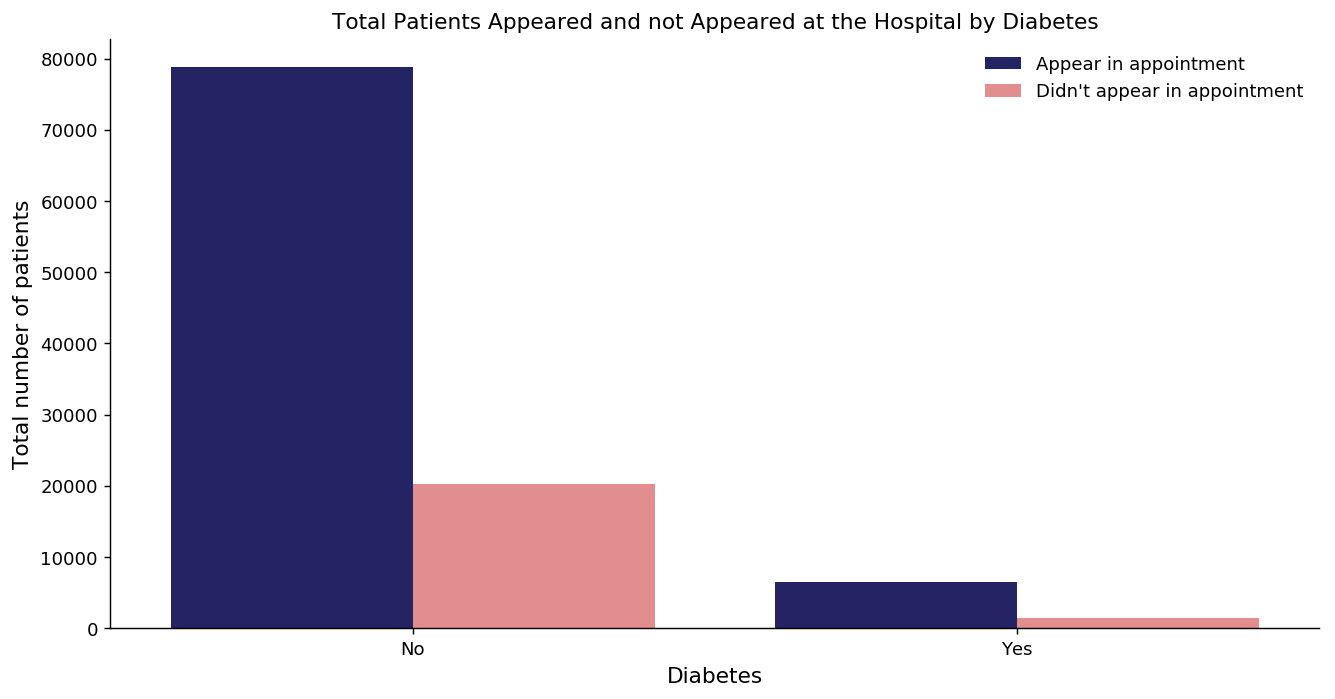

In [37]:
graph(df, 'diabetes')

_Didn't Appeared in their appointments:_

In [38]:
proportion(Not_showed, 'diabetes')

The proportion of Not diabetes patients who showed in their appointments was about 19.0%, while the proportion of diabetes patients who showed was 1.0% from total patients.


_Appeared in their appointments:_

In [39]:
proportion(Showed, 'diabetes')

The proportion of Not diabetes patients who showed in their appointments was about 74.0%, while the proportion of diabetes patients who showed was 6.0% from total patients.


> **Alcoholism:**

In [40]:
count(df, 'alcoholism')

alcoholism  not_showed
No          No            82616
            Yes           21000
Yes         No             2683
            Yes             677
Name: not_showed, dtype: int64


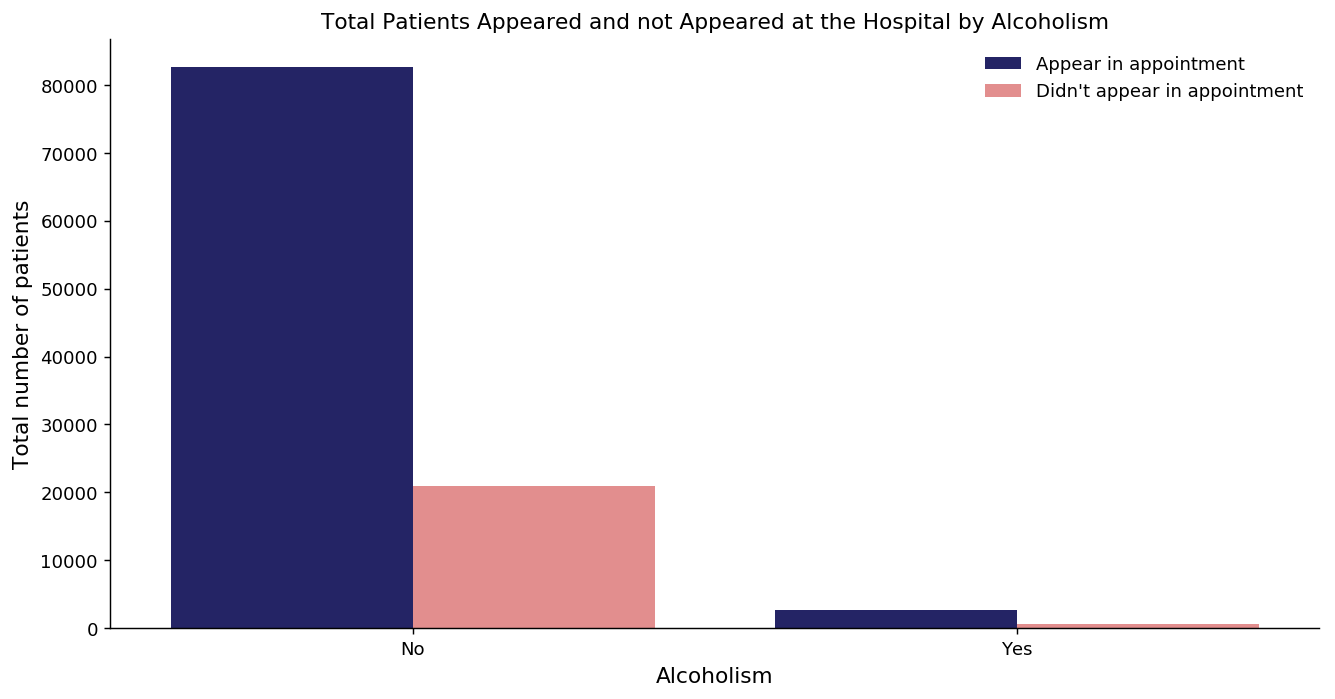

In [41]:
graph(df, 'alcoholism')

_Didn't Appeared in their appointments:_

In [42]:
proportion(Not_showed, 'alcoholism')

The proportion of Not alcoholism patients who showed in their appointments was about 20.0%, while the proportion of alcoholism patients who showed was 1.0% from total patients.


_Appeared in their appointments:_

In [43]:
proportion(Showed, 'alcoholism')

The proportion of Not alcoholism patients who showed in their appointments was about 77.0%, while the proportion of alcoholism patients who showed was 3.0% from total patients.


> **All Endemic illnesses:**

_Didn't Appeared in their appointments:_

In [51]:
# Grouping by the 3 endemic illnesses:
df_all = Not_showed.groupby(['alcoholism', 'diabetes', 'hypertension'])['not_showed'].count()
Cases_total = df['not_showed'].count()
Not_showed_proportion = (df_all/Cases_total) *100
Not_showed_proportion[-5]
print("The proportion of Normal patients without Endemic Illnesses and didn't appeared in their appointments was about {}%, while the proportion of patients suffered from Endemics (Diabetic, Hypertension) who didn't appeared was {}% from the total patients.".format(round(Not_showed_proportion[1], 2), round(Not_showed_proportion[-5], 2)))

The proportion of Normal patients without Endemic Illnesses and didn't appeared in their appointments was about 2.27%, while the proportion of patients suffered from Endemics (Diabetic, Hypertension) who didn't appeared was 1.02% from the total patients.


**Research Question 1: Is there a correlation between chronic diseases like Hypertension, Diabetes, and Alcoholism on the patient's commitment to his appointment?**
> According to the berevious findings:
* Normotensive (Not Hypertensive) patients tend to appear in their appointments less than Hypertensive patients.
* Diabetic patients tend to appear in their appointments less than non Diabetic patients.
* Alcoholism patients tend to appear in their appointments less than non Alcoholism patients.

### _Research Question 2:_  Was patients' commitment to the hospital appointment associated with their Demographic Characteristics (Age, Gender, Handicap, and Location of the hospital)?

> **Age:**

In [52]:
age_mean = df.groupby(['not_showed']).age.mean() # Calculating mean age
age_std = df.groupby(['not_showed']).age.std() # Calculating Standard deviation of age

print("The mean age of patients who appeared in their appointments was about {} ± {}, while the mean age of patients who appeared was {} ± {} years.".format(round(age_mean[0],2), round(age_std[0],2), round(age_mean[1],2), round(age_std[1], 2)))

The mean age of patients who appeared in their appointments was about 39.07 ± 22.64, while the mean age of patients who appeared was 35.32 ± 21.45 years.


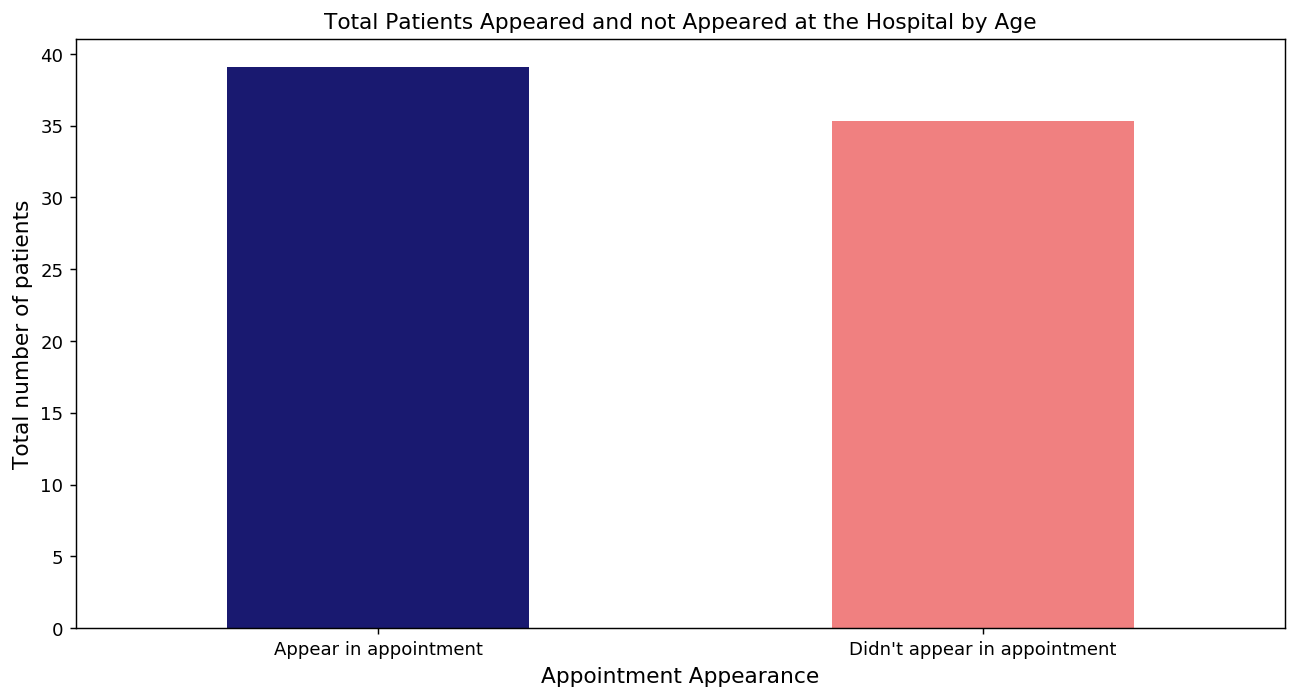

In [53]:
# Changing graph size
plt.figure(figsize=(12,6), dpi = 130);
age_mean.plot(kind='bar',color=['midnightblue','lightcoral']); # Plotting arguments
# Changing xlable levels
plt.xticks([0,1],['Appear in appointment',"Didn't appear in appointment"]); 
# Rotating the levels of x axis
plt.xticks(rotation=360);
# Changing xlable
plt.xlabel('Appointment Appearance', fontsize = 12);
# Changing ylable
plt.ylabel('Total number of patients', fontsize = 12)
# Changing graph title
plt.title('Total Patients Appeared and not Appeared at the Hospital by Age');

> **Gender:**

In [54]:
count(df, 'gender')

gender  not_showed
Female  No            55837
        Yes           14272
Male    No            29462
        Yes            7405
Name: not_showed, dtype: int64


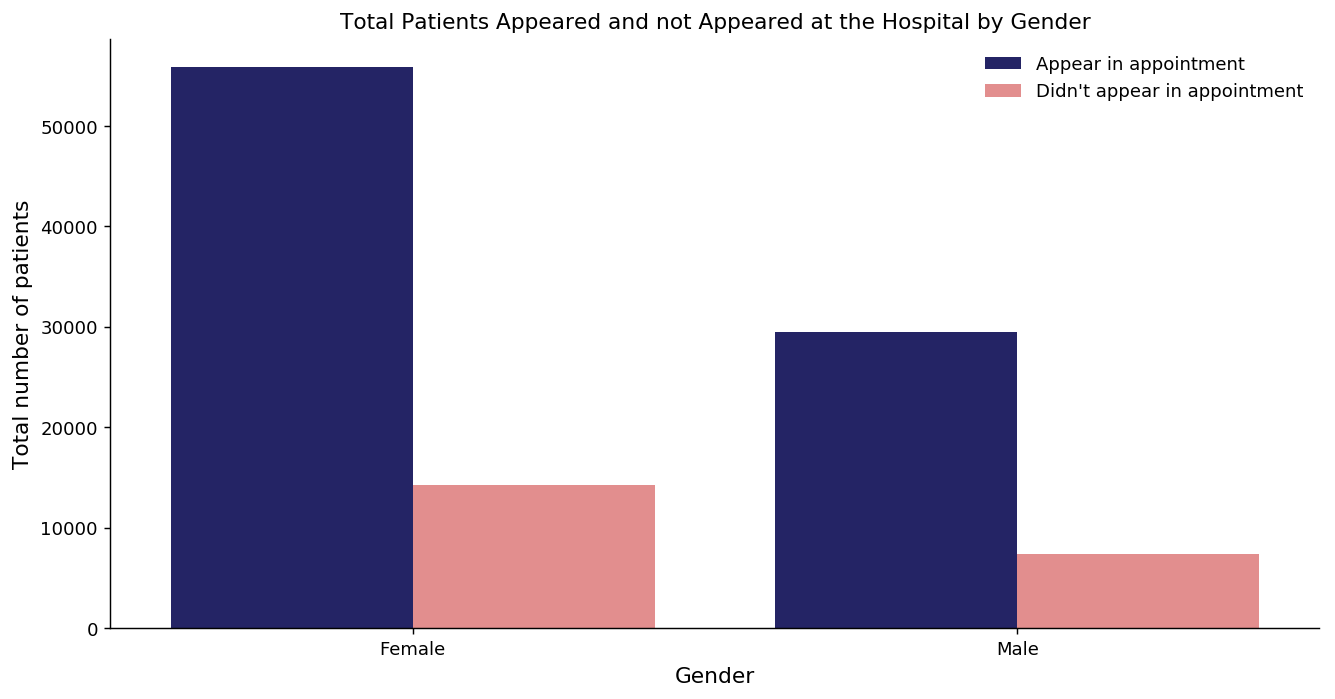

In [55]:
graph(df, 'gender')

_Didn't Appeared in their appointments:_

In [56]:
proportion(Not_showed, 'gender')

The proportion of Not gender patients who showed in their appointments was about 13.0%, while the proportion of gender patients who showed was 7.0% from total patients.


_Appeared in their appointments:_

In [57]:
proportion(Showed, 'gender')

The proportion of Not gender patients who showed in their appointments was about 52.0%, while the proportion of gender patients who showed was 28.0% from total patients.


_Presence of any type of Handicap:_

In [58]:
count(df, 'handcap')

handcap  not_showed
False    No            83469
         Yes           21273
True     No             1672
         Yes             363
Name: not_showed, dtype: int64


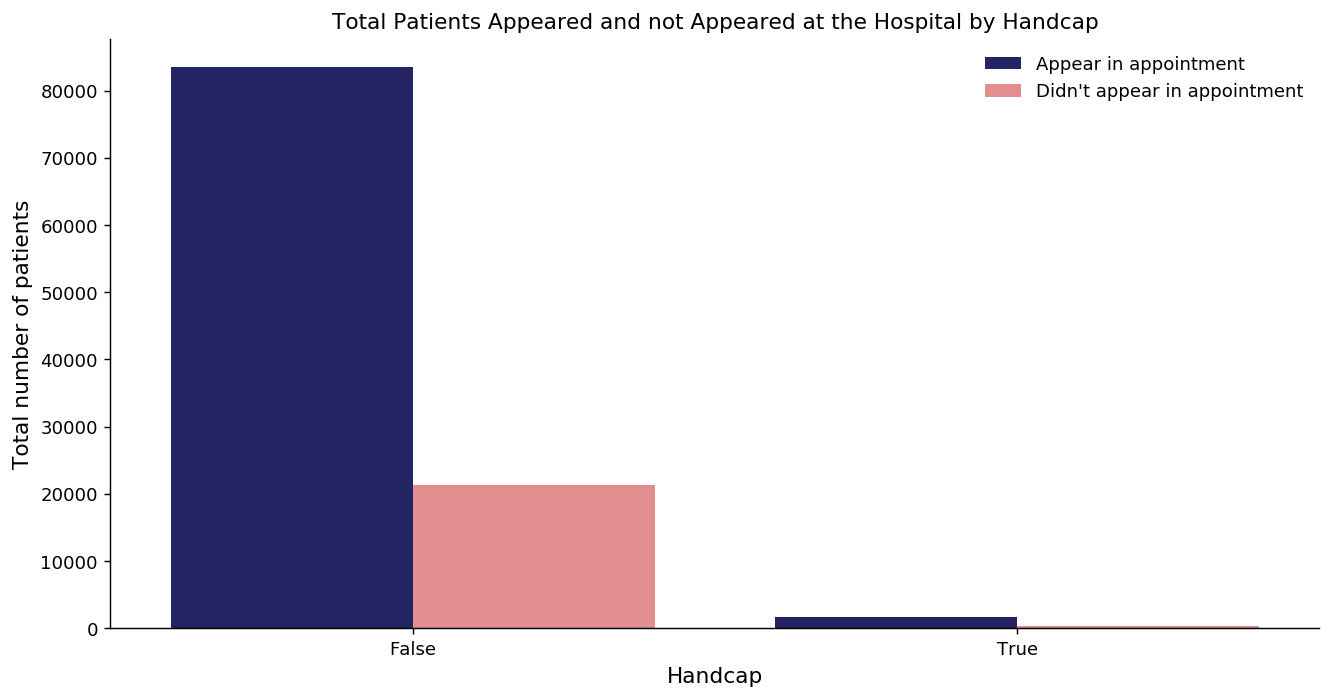

In [59]:
graph(df, 'handcap')

_Didn't Appeared in their appointments:_

In [60]:
proportion(Not_showed, 'handcap')

The proportion of Not handcap patients who showed in their appointments was about 20.0%, while the proportion of handcap patients who showed was 0.0% from total patients.


_Appeared in their appointments:_

In [61]:
proportion(Showed, 'handcap')

The proportion of Not handcap patients who showed in their appointments was about 78.0%, while the proportion of handcap patients who showed was 2.0% from total patients.


> **Neighborhood:**

_Didn't Appeared in their appointments:_

In [62]:
df_neighbour = Not_showed.groupby('neighbourhood')['not_showed'].value_counts().sort_values(ascending=False)
df_neighbour[:10]

neighbourhood      not_showed
JARDIM CAMBURI     Yes           1432
MARIA ORTIZ        Yes           1194
ITARARÉ            Yes            898
RESISTÊNCIA        Yes            875
CENTRO             Yes            692
JESUS DE NAZARETH  Yes            676
JARDIM DA PENHA    Yes            627
CARATOÍRA          Yes            586
TABUAZEIRO         Yes            552
BONFIM             Yes            537
Name: not_showed, dtype: int64

In [63]:
print("From the graph Below, it seems that the patients didn\'t appeared in their appointments if the hospital in JARDIM CAMBURI Neighbourhood ({} patients), while hospitals located in AEROPORTO Neighbourhood have the least number of non committed patients ({} patient).".format(df_neighbour[0], df_neighbour[-1]))

From the graph Below, it seems that the patients didn't appeared in their appointments if the hospital in JARDIM CAMBURI Neighbourhood (1432 patients), while hospitals located in AEROPORTO Neighbourhood have the least number of non committed patients (1 patient).


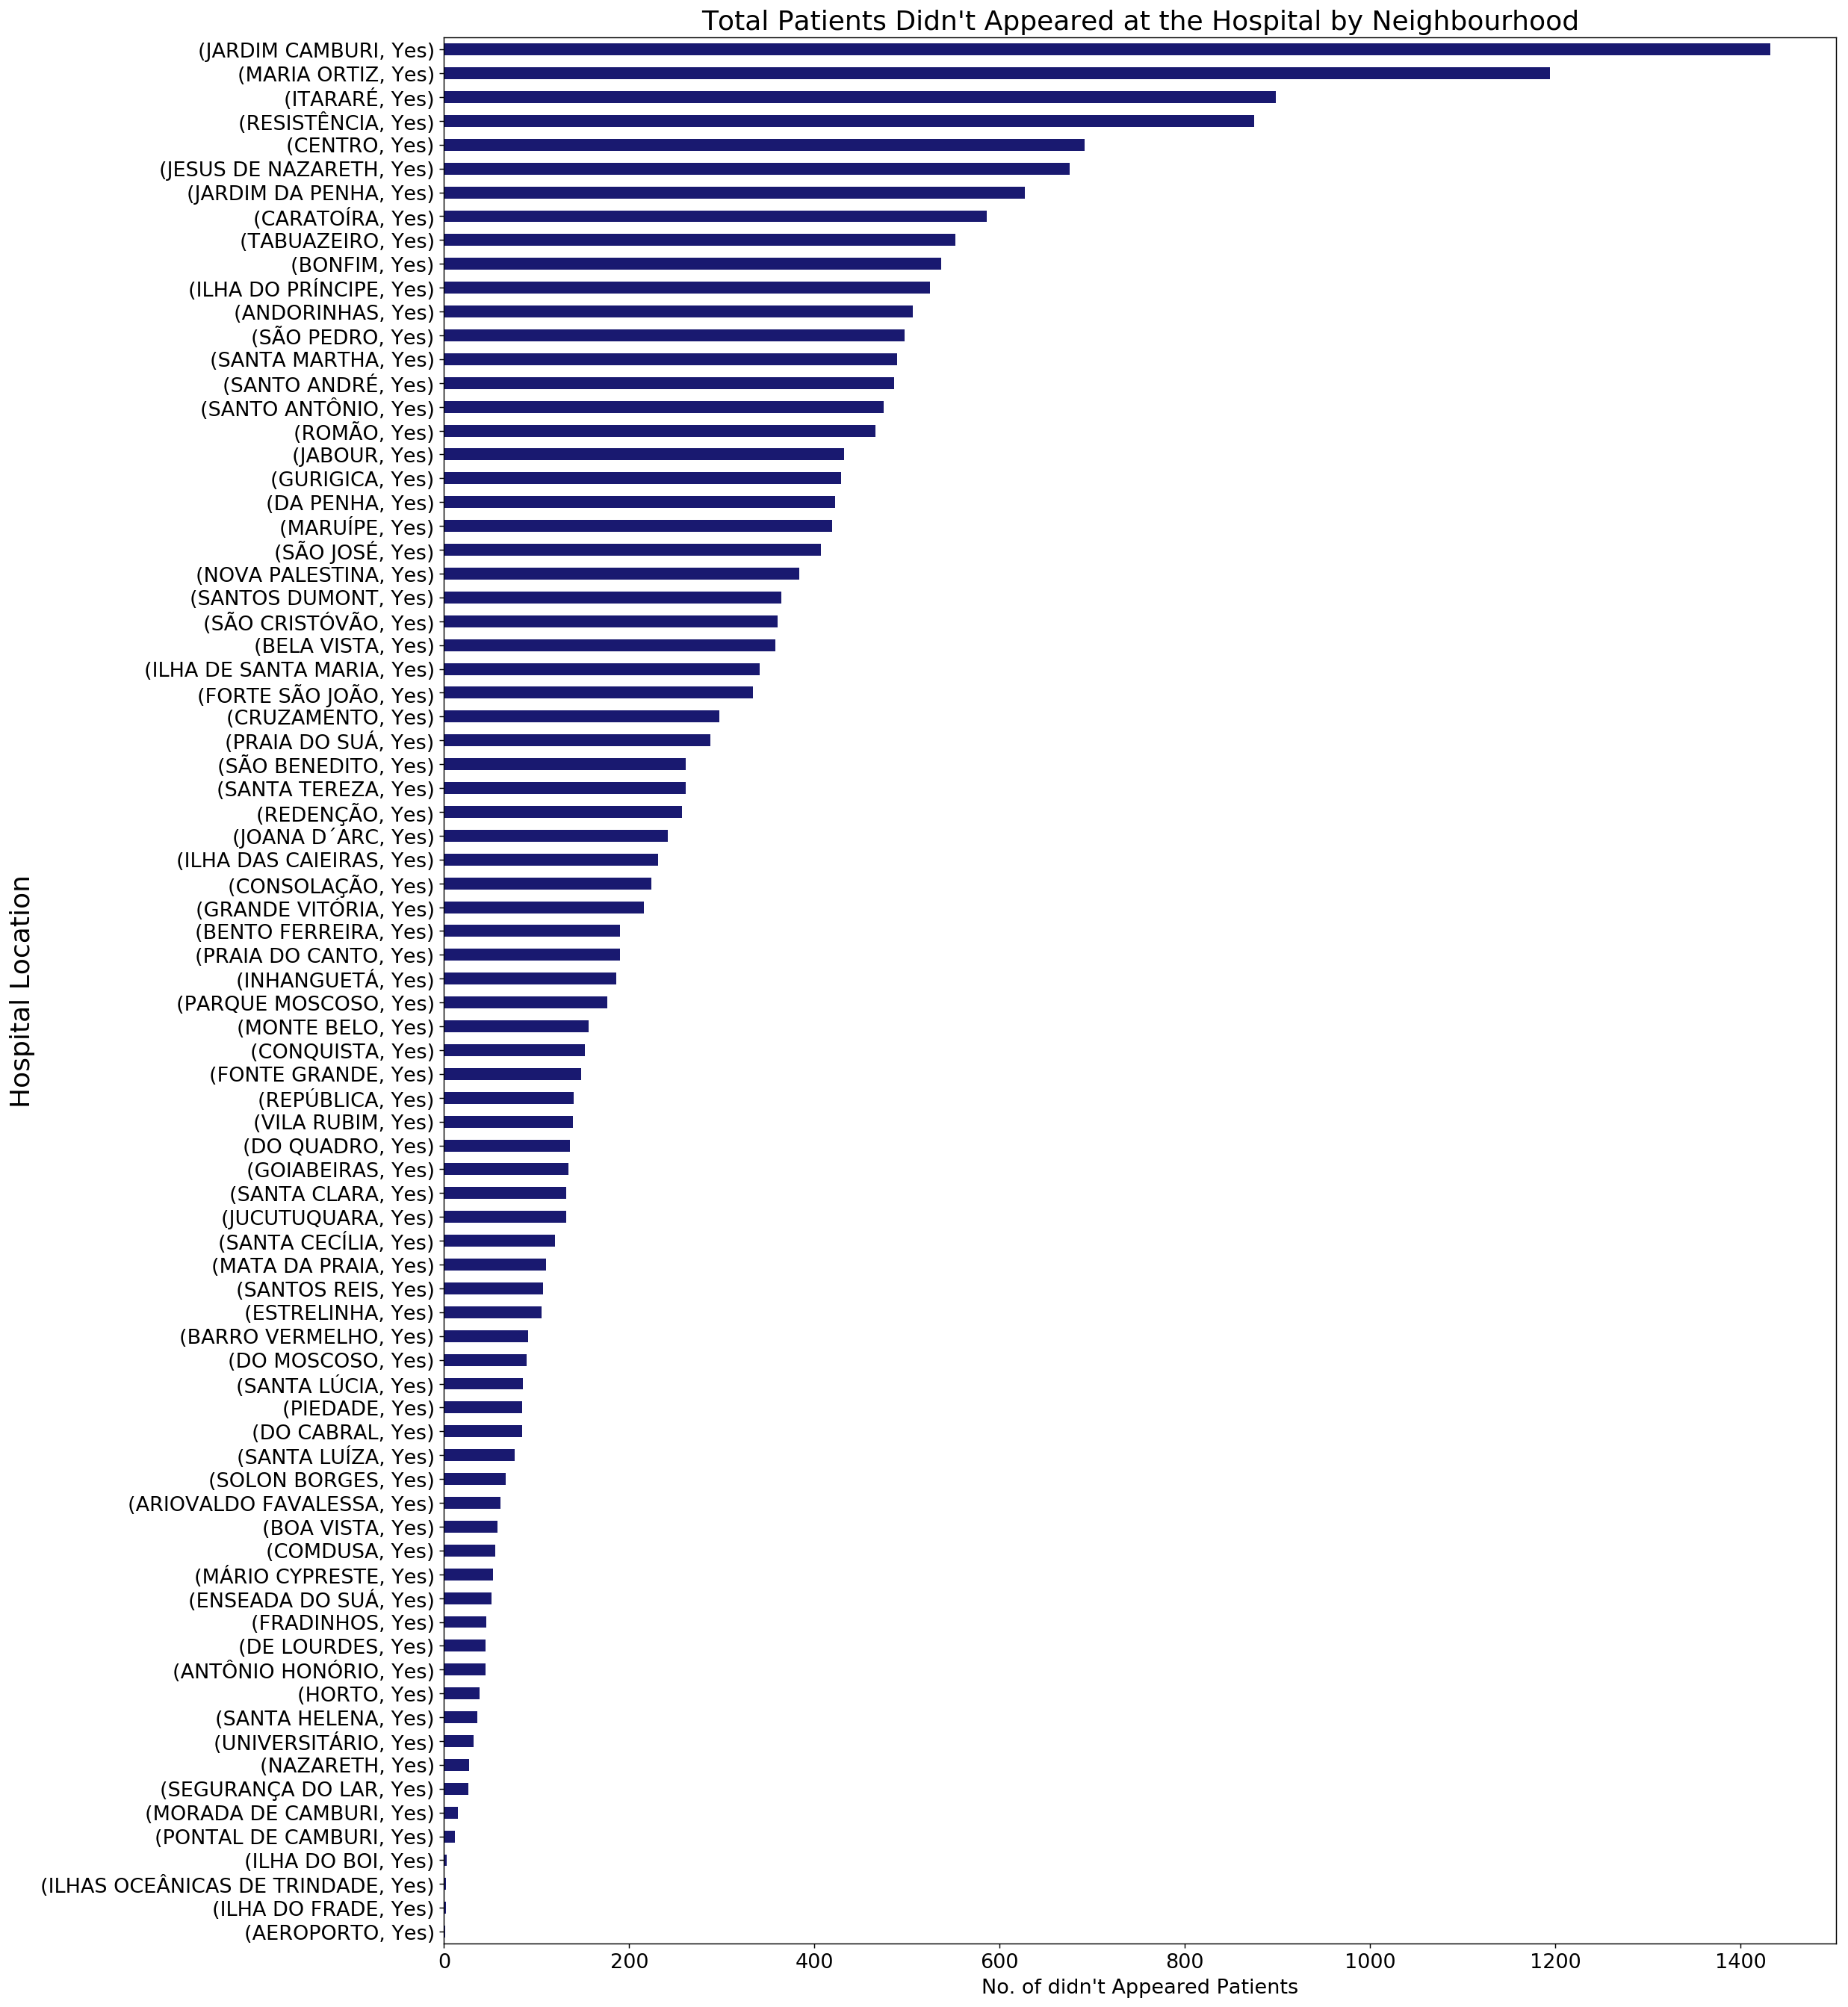

In [64]:
plt.figure(figsize=(18.5,20), dpi = 130)
df_neighbour.sort_values(ascending = True, inplace = True)
neighbour_graph = df_neighbour.plot.barh(color = 'midnightblue', fontsize = 15)
plt.xlabel('No. of didn\'t Appeared Patients', fontsize = 15)
plt.ylabel('Hospital Location', fontsize = 20)
plt.title('Total Patients Didn\'t Appeared at the Hospital by Neighbourhood', fontsize = 20)
neighbour_graph.figure.set_size_inches(18.5, 26)

plt.show()

**Research Question 2: Was patients' commitment to the hospital appointment associated with their Demographic Characteristics (Age, Gender, and Neighbourhood where they lived)?**
> _According to the berevious findings:_
* **Older patients** tends to commit to their hospital appointments than younger aged patients.
* **Female patients** tendes to appear in their hospital appointments than Male patients
* Patients with any type of Handicap tends to miss their hospital appointment more than normal patients.
* Hospitals located in **JARDIM CAMBURI Neighbourhood** tends to have a significant number of patients who miss their appointments in hospital than other hospitals location.

### _Research Question 3:_  Is there an association between receiving SMS before the hospital appointment and and patients' commitment to the hospital appointment?

> **Receiving SMS before the Appointment:**

In [65]:
count(df, 'sms_received')

sms_received  not_showed
No            No            60284
              Yes           12109
Yes           No            25015
              Yes            9568
Name: not_showed, dtype: int64


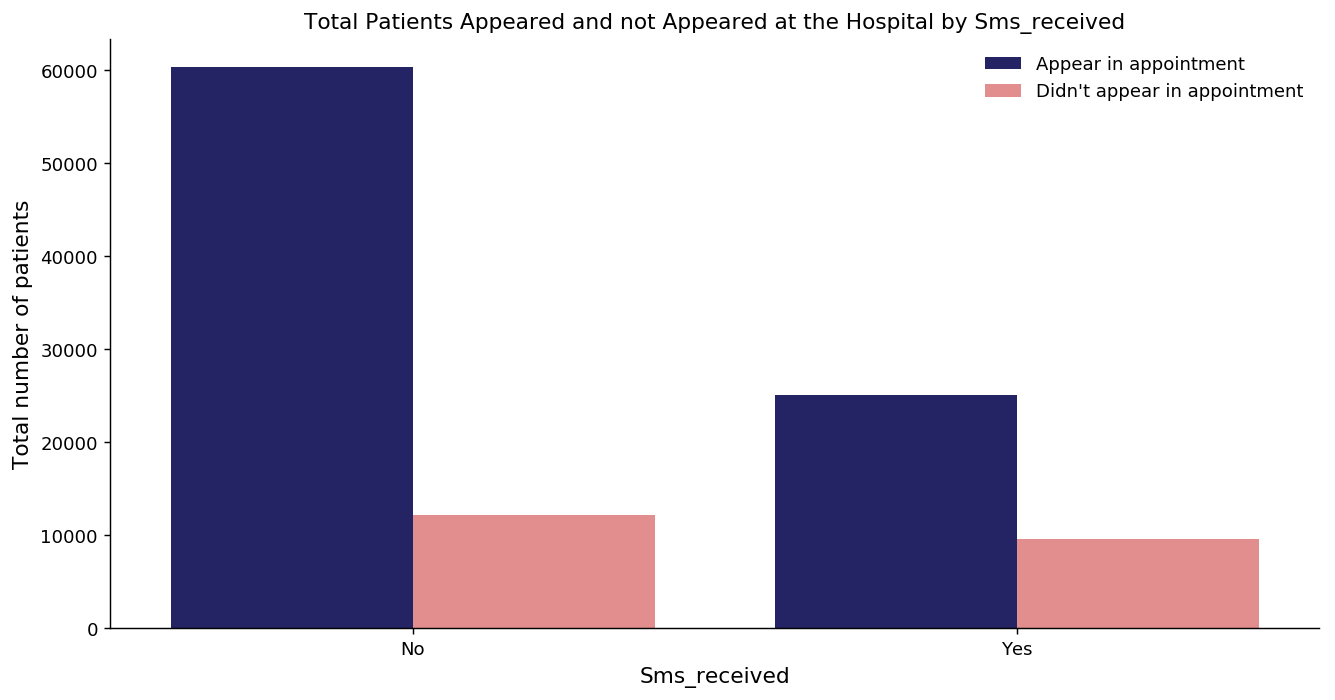

In [66]:
graph(df, 'sms_received')

_Didn't Appeared in their appointments:_

In [67]:
proportion(Not_showed, 'sms_received')

The proportion of Not sms_received patients who showed in their appointments was about 11.0%, while the proportion of sms_received patients who showed was 9.0% from total patients.


_Appeared in their appointments:_

In [68]:
proportion(Showed, 'sms_received')

The proportion of Not sms_received patients who showed in their appointments was about 56.0%, while the proportion of sms_received patients who showed was 23.0% from total patients.


**Research Question 3: Is there an association between receiving SMS before the hospital appointment and and patients' commitment to the hospital appointment?**
> _According to the berevious findings:_
* **Receiving SMS** _Decrease_ the number of patient's who missed the hospital appointment.


### _Research Question 4:_ Is there an association between patient enrollment in the "Bolsa Familia" Program and patients' commitment to the hospital appointment?

> Scholarship Program is The "Project Family Grant" of the World Bank, inaugurated in June 2005, collaborates with the Bolsa Familia program first launched in Brazil. Read more about this programme in [Wikipedia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)

In [69]:
count(df, 'scholarship')

scholarship  not_showed
False        No            77061
             Yes           19106
True         No             8238
             Yes            2571
Name: not_showed, dtype: int64


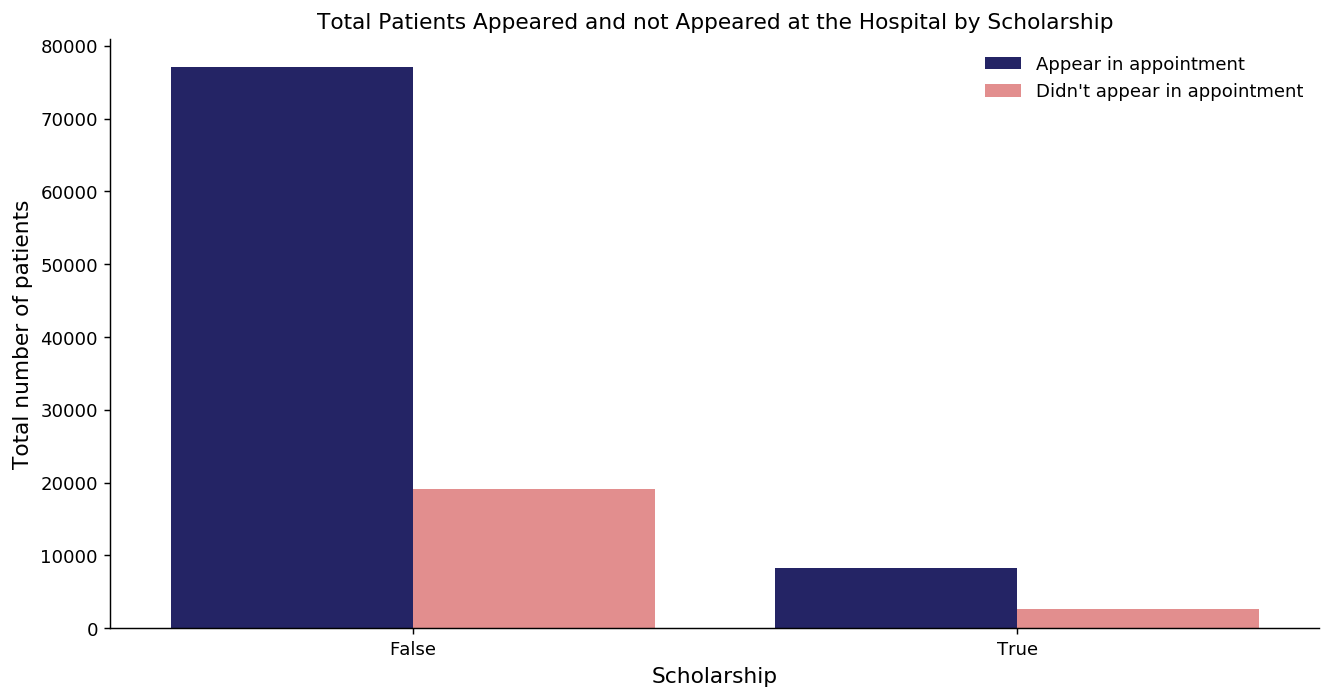

In [70]:
graph(df, 'scholarship')

_Didn't Appeared in their appointments:_

In [71]:
proportion(Not_showed, 'scholarship')

The proportion of Not scholarship patients who showed in their appointments was about 18.0%, while the proportion of scholarship patients who showed was 2.0% from total patients.


_Appeared in their appointments:_

In [72]:
proportion(Showed, 'scholarship')

The proportion of Not scholarship patients who showed in their appointments was about 72.0%, while the proportion of scholarship patients who showed was 8.0% from total patients.


**Research Question 4: Is there an association between patient enrollment in the "Bolsa Familia" Program and patients' commitment to the hospital appointment?**
> _According to the berevious findings:_
* Enrollment in the Bolsa Familia Program is not associated with the commitment of Hospital Appointment.


<a id='conclusions'></a>
## Conclusions

* Endemic diseases like Hypertension, Diabetes, or Alcoholism are not associated with the commitment of patients to their hospital appointment.
* Female patients are more likely to commit to their appointment.
* Older ages are more committed to their hospital appointment than younger ages.
* Bolsa Familia program has no effect on the follow-up of their health in the hospital.
* Patients without any Handicap are more committed to their hospital appointment.

### Limitations

* A lot of factors must be involved in this data to illustrate the reasons for missing appointments. Some of these factors related to Patient Hospital relationships as the distance between patients and hospital location, if the hospital is clean and quits if there are many different prices on the patients if they appeared in their appointments, and so on. Some factors could be related to the patients' doctor relationships, like involving in their treatment plan if physicians listen and care to them. All these factors must be involved in the data.
* A lot of statistical tests like independent sample t-test, Chi-square, and ANOVA test should be done.
* Regression analysis should predict the actual reasons for missing appointments.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1